In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from nanonets import NanoparticleElectrostatic

plt.style.use(["science","bright","grid"])

In [ ]:
sim     = NanoparticleElectrostatic()
h_vals  = np.linspace(1.0,100.0,100)
cap     = [sim.self_capacitance_sphere(3.9,10.0,h_oxide) for h_oxide in h_vals]
cap0    = sim.self_capacitance_sphere(3.9,10.0)

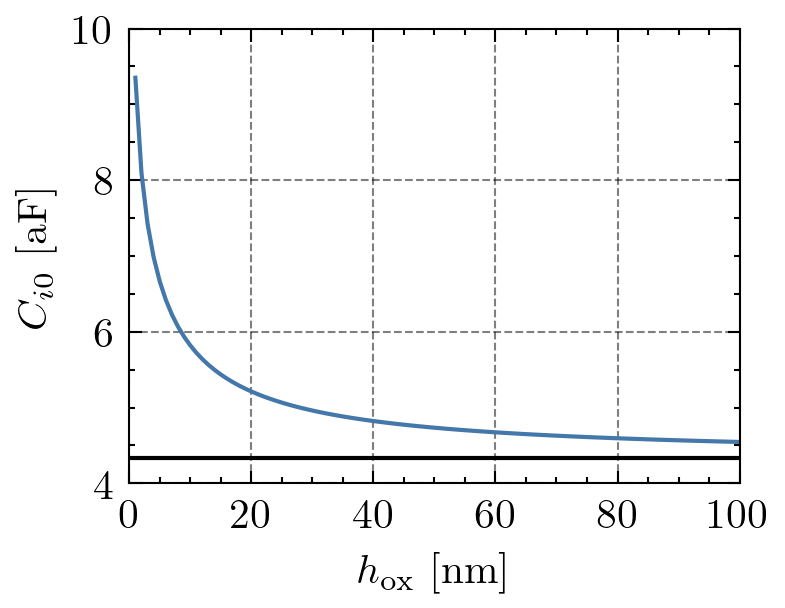

In [22]:
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
fig.set_size_inches(w * scale, h * scale)

_ = ax.plot(h_vals, cap)
_ = plt.axhline(cap0, color='black')
_ = ax.set_xlim(0,100)
_ = ax.set_ylim(4,10)
_ = ax.set_xticks([0,20,40,60,80,100])
_ = ax.set_xlabel("$h_\\textrm{ox}~[\mathrm{nm}]$")
_ = ax.set_ylabel("$C_{i0}~[\mathrm{aF}]$")